# Model Evaluation

## Cross-Validating Models

Problem : You want to evaluate how well your model will work in the real world.

In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# Calculate mean
cv_results.mean()


0.96493171942892597

In [2]:
# View score for all 10 folds
cv_results

array([ 0.97222222,  0.97777778,  0.95555556,  0.95      ,  0.95555556,
        0.98333333,  0.97777778,  0.96648045,  0.96089385,  0.94972067])

In [3]:
# Import library
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [4]:
# Create a pipeline
pipeline = make_pipeline(standardizer, logit)

In [5]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [6]:
cv_results

array([ 0.97222222,  0.97777778,  0.95555556,  0.95      ,  0.95555556,
        0.98333333,  0.97777778,  0.96648045,  0.96089385,  0.94972067])

it is often beneficial to have folds containing roughly the same percentage of observations from each of the different target classes (called stratified k-fold). For example, if our target vector contained gender and 80% of the observations were male, then each fold would contain 80% male and 20% female observations. In scikit-learn, we can conduct stratified k-fold cross-validation by replacing the KFold class with StratifiedKFold.

In [7]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             n_jobs=-1) # Use all CPU scores
cv_results

array([ 0.97222222,  0.97777778,  0.95555556,  0.95      ,  0.95555556,
        0.98333333,  0.97777778,  0.96648045,  0.96089385,  0.94972067])

## Creating a Baseline Regression Model

Problem: You want a simple baseline regression model to compare against your model.

In [8]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor

# Load data
boston = load_boston()

# Create features
features, target = boston.data, boston.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.0011193592039553391

In [9]:
# Load library
from sklearn.linear_model import LinearRegression

# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(features_test, target_test)

0.63546384332021288

DummyRegressor allows us to create a very simple model that we can use as a baseline to compare against our actual model.

In [10]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# Evaluate score
clf.score(features_test, target_test)

-0.065105020293257265

y default, score returns the coefficient of determination (R-squared, R_2) score.

## Creating a Baseline Classification Model


Problem : You want a simple baseline classifier to compare against your model.

In [12]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier

# Load data
iris = load_iris()

# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

    * "stratified": generates predictions by respecting the training
      set's class distribution.
    * "most_frequent": always predicts the most frequent label in the
      training set.
    * "prior": always predicts the class that maximizes the class prior
      (like "most_frequent") and ``predict_proba`` returns the class prior.
    * "uniform": generates predictions uniformly at random.
    * "constant": always predicts a constant label that is provided by
      the user. This is useful for metrics that evaluate a non-majority
      class

`stratified` makes predictions that are proportional to the training set’s target vector’s class proportions (i.e., if 20% of the observations in the training data are women, then DummyClassifier will predict women 20% of the time).

`uniform` will generate predictions uniformly at random between the different classes

## Evaluating Binary Classifier Predictions

Problem: Given a trained classification model, you want to evaluate its quality.

In [16]:
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# Create logistic regression
logit = LogisticRegression(solver='lbfgs')

# Cross-validate model using accuracy
cross_val_score(logit, X, y, cv=3, scoring="accuracy")

array([ 0.95170966,  0.9580084 ,  0.95558223])

proportion of observations predicted correctly.

In [19]:
#Cross-validate model using precision
cross_val_score(logit, X, y, cv=3,scoring="precision")

array([ 0.95252404,  0.96583282,  0.95558223])

In [21]:
# Cross-validate model using recall
cross_val_score(logit, X, y, cv=3, scoring="recall")

array([ 0.95080984,  0.94961008,  0.95558223])

of observations labeled as positive, how many are actually positive:

In [25]:
# Cross-validate model using f1
cross_val_score(logit, X, y, cv=3, scoring="f1")

array([ 0.95166617,  0.95765275,  0.95558223])

In [24]:
from sklearn.metrics import accuracy_score

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_hat)

0.94699999999999995

## Evaluating Binary Classifier Thresholds

Problem: You want to evaluate a binary classifier and various probability thresholds.

In [26]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


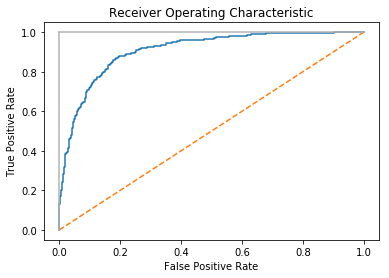

In [29]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [30]:
# Get predicted probabilities
# to see the predicted probabilities for the first observation:
logit.predict_proba(features_test)[0:1]

array([[ 0.8688938,  0.1311062]])

the first observation has an ~87% chance of being in the negative class (0) and a 13% chance of being in the positive class (1)

In [31]:
logit.classes_

array([0, 1])

In [33]:
target_probabilities.shape

(1000,)

In [37]:
target_probabilities[:10]

array([ 0.1311062 ,  0.53689296,  0.96604777,  0.60394537,  0.33331238,
        0.92949984,  0.03190715,  0.15609781,  0.67018767,  0.08734715])

In [34]:
logit.predict_proba(features_test).shape

(1000, 2)

In [36]:
logit.predict_proba(features_test)

array([[ 0.8688938 ,  0.1311062 ],
       [ 0.46310704,  0.53689296],
       [ 0.03395223,  0.96604777],
       ..., 
       [ 0.46714983,  0.53285017],
       [ 0.67446609,  0.32553391],
       [ 0.16098573,  0.83901427]])

In [38]:
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.533242268426
True Positive Rate: 0.810204081633
False Positive Rate: 0.149019607843


if we increase the threshold to ~80% (i.e., increase how certain the model has to be before it predicts an observation as positive) the TPR drops significantly but so does the FPR

In [39]:
print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.818959989895
True Positive Rate: 0.544897959184
False Positive Rate: 0.0470588235294


The better a model is, the higher the curve and thus the greater the area under the curve

In [40]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.90733893557422973

## Evaluating Multiclass Classifier Predictions

Problem : You have a model that predicts three or more classes and want to evaluate its performance.



In [45]:
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 3,
                           random_state = 1)

# Create logistic regression
logit = LogisticRegression(multi_class='auto', solver='lbfgs')

# Cross-validate model using accuracy
cross_val_score(logit, features, target, cv=3, scoring='accuracy')

array([ 0.83503299,  0.82958296,  0.81278128])

In [47]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, cv=3, scoring='f1_macro')

array([ 0.83477937,  0.82931964,  0.81275734])

In [48]:
cross_val_score(logit, features, target, cv=3, scoring='f1_micro')

array([ 0.83503299,  0.82958296,  0.81278128])

In [49]:
cross_val_score(logit, features, target, cv=3, scoring='f1_weighted')

array([ 0.83481917,  0.82935178,  0.81279478])

## Visualizing a Classifier’s Performance

Problem : Given predicted classes and true classes of the test data, you want to visually compare the model’s quality.

In [50]:
# Load libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)
matrix

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[13,  0,  0],
       [ 0, 10,  6],
       [ 0,  0,  9]])

In [51]:
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
dataframe


,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,10,6
virginica,0,0,9


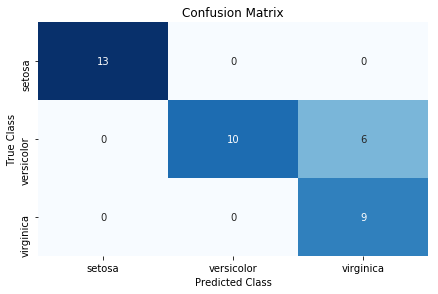

In [52]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

Each column of the matrix (often visualized as a heatmap) represents predicted classes, while every row shows true classes. 

The bottom-right cell indicates that the model successfully predicted nine observations were Iris virginica, but (looking one cell up) predicted six flowers to be viriginica that were actually Iris versicolor.

## Evaluating Regression Models

Problem : You want to evaluate the performance of a regression model.

Use mean squared error (MSE):

In [54]:
# Load libraries
from sklearn.datasets import make_regression

# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

In [56]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, cv=3, scoring='r2')

array([ 0.87804558,  0.76395862,  0.89154377])

## Evaluating Clustering Models

Problem: You have used an unsupervised learning algorithm to cluster your data. Now you want to know how well it did.

In [57]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate feature matrix
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

0.89162655640721422

In [58]:
features.shape

(1000, 10)